In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import pickle5 as pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve
import scikitplot as skplt

def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

def create_roc_curve(classifier, labels, scores):
  disp = plot_roc_curve(classifier, X_test, y_test)
  disp.ax_.set_title('ROC Curve')
  #plt.show()

def create_precision_recall_curve(model, y_test, x_test, pred):
    average_precision = average_precision_score(y_test, pred)
    disp = plot_precision_recall_curve(model, x_test, y_test)
    disp.ax_.set_title('Precision-Recall curve')

In [3]:
with open( "/mnt/vdb/thesis/jax/AMPNonAMP.V5_C08_sim60.reps", 'rb') as file:
    AMPs_df = pickle.load(file)

In [3]:
with open( "/mnt/vdb/thesis/trainingset2/set10/jax/AMPNonAMP.reps", 'rb') as file:
    AMPNonAMP_df = pickle.load(file)

with open( "/mnt/vdb/thesis/trainingset2/benchmark_set/jax/AMPNonAMP.benchmark_set.reps", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)

In [ ]:
AMPs_df.drop_duplicates(subset=['Sequence'],inplace=True)

In [4]:
df =AMPs_df[["reps","class"]]
df
df_new = df.reps.apply(pd.Series).astype(np.float64)
df_new['class'] = df['class']
df_new

,0,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,class
210,0.020596,0.051454,0.009273,0.008583,-0.158560,0.096443,-0.280527,-0.004144,-0.024222,0.139821,...,0.017658,-0.178922,0.061034,-0.049153,-0.008552,0.295699,0.078237,0.084181,-0.002584,0
371,0.006680,-0.095586,0.059442,-0.021558,0.138408,-0.023227,-0.168920,-0.101124,-0.007432,0.117733,...,0.028154,-0.020222,0.024706,-0.072173,0.014760,0.140324,0.024822,-0.013351,-0.060497,0
420,0.010706,0.005045,0.022312,-0.010357,-0.001492,0.035573,-0.232180,-0.016746,-0.010970,0.026109,...,0.133411,-0.094850,0.031804,-0.086968,-0.029461,0.069626,0.047517,0.130172,0.006449,0
168,0.002073,-0.076902,-0.021565,0.016011,-0.059204,0.027183,-0.491927,0.013376,-0.020296,0.069320,...,0.020355,-0.125865,0.025240,0.004637,-0.003113,0.012125,0.028679,0.384807,0.030021,0
344,0.029898,-0.004466,-0.015070,0.031181,-0.066619,0.152418,-0.388183,-0.017860,-0.035654,0.172902,...,-0.017706,-0.102827,0.035134,0.017357,0.010981,0.447118,0.093590,0.055483,0.014400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.013467,-0.135259,0.022123,0.004654,0.001060,0.035953,-0.242629,-0.004931,-0.015722,0.167582,...,0.067011,-0.050945,0.003909,0.007646,0.042930,0.086973,0.000517,0.206966,0.017166,0
447,0.019307,-0.030070,-0.012818,0.012989,0.020863,0.016052,-0.325731,-0.042692,-0.017072,0.111204,...,0.015929,-0.156615,0.030351,-0.023633,0.000660,0.026462,-0.004548,0.140177,0.027681,0
5,0.008608,-0.057360,0.019528,0.004598,-0.079074,0.019588,-0.113827,-0.013885,-0.014072,0.050159,...,0.008678,-0.124026,0.029327,-0.062297,-0.022352,0.069006,0.003294,0.120658,0.082524,0
477,0.014597,-0.139941,0.026719,0.003316,-0.017684,0.038440,-0.253193,-0.000880,-0.015894,0.151149,...,0.062336,-0.044791,-0.008192,0.044289,0.043903,0.078633,-0.006654,0.192273,0.040663,0


In [5]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
210,0.020596,0.051454,0.009273,0.008583,-0.158560,0.096443,-0.280527,-0.004144,-0.024222,0.139821,...,0.064921,0.017658,-0.178922,0.061034,-0.049153,-0.008552,0.295699,0.078237,0.084181,-0.002584
371,0.006680,-0.095586,0.059442,-0.021558,0.138408,-0.023227,-0.168920,-0.101124,-0.007432,0.117733,...,0.092843,0.028154,-0.020222,0.024706,-0.072173,0.014760,0.140324,0.024822,-0.013351,-0.060497
420,0.010706,0.005045,0.022312,-0.010357,-0.001492,0.035573,-0.232180,-0.016746,-0.010970,0.026109,...,0.048697,0.133411,-0.094850,0.031804,-0.086968,-0.029461,0.069626,0.047517,0.130172,0.006449
168,0.002073,-0.076902,-0.021565,0.016011,-0.059204,0.027183,-0.491927,0.013376,-0.020296,0.069320,...,0.037901,0.020355,-0.125865,0.025240,0.004637,-0.003113,0.012125,0.028679,0.384807,0.030021
344,0.029898,-0.004466,-0.015070,0.031181,-0.066619,0.152418,-0.388183,-0.017860,-0.035654,0.172902,...,0.037580,-0.017706,-0.102827,0.035134,0.017357,0.010981,0.447118,0.093590,0.055483,0.014400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.013467,-0.135259,0.022123,0.004654,0.001060,0.035953,-0.242629,-0.004931,-0.015722,0.167582,...,0.022613,0.067011,-0.050945,0.003909,0.007646,0.042930,0.086973,0.000517,0.206966,0.017166
447,0.019307,-0.030070,-0.012818,0.012989,0.020863,0.016052,-0.325731,-0.042692,-0.017072,0.111204,...,0.049278,0.015929,-0.156615,0.030351,-0.023633,0.000660,0.026462,-0.004548,0.140177,0.027681
5,0.008608,-0.057360,0.019528,0.004598,-0.079074,0.019588,-0.113827,-0.013885,-0.014072,0.050159,...,0.069397,0.008678,-0.124026,0.029327,-0.062297,-0.022352,0.069006,0.003294,0.120658,0.082524
477,0.014597,-0.139941,0.026719,0.003316,-0.017684,0.038440,-0.253193,-0.000880,-0.015894,0.151149,...,0.023765,0.062336,-0.044791,-0.008192,0.044289,0.043903,0.078633,-0.006654,0.192273,0.040663


In [10]:

RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)

In [11]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4335
           1       0.90      0.91      0.91      4056

    accuracy                           0.91      8391
   macro avg       0.91      0.91      0.91      8391
weighted avg       0.91      0.91      0.91      8391

0.9094267667739244


# Old method

In [3]:
def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

In [5]:
#X= np.array(AMPs_df['reps'].to_list())
#y= np.array(AMPs_df['class'].to_list())
X_train, X_test, y_train, y_test = train_test_split(np.array(AMPs_df['reps'].to_list()), np.array(AMPs_df['class'].to_list()), test_size=0.2, random_state=42)

In [6]:
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     13914
           1       0.91      0.92      0.92     13564

    accuracy                           0.92     27478
   macro avg       0.92      0.92      0.92     27478
weighted avg       0.92      0.92      0.92     27478

0.9160055316980857
[[12659  1255]
 [ 1053 12511]]


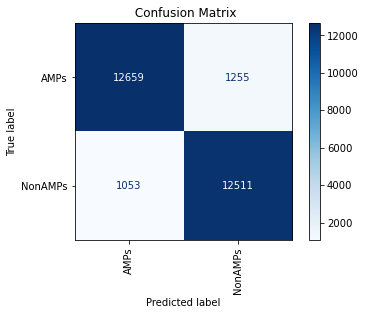

In [7]:

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
confusion_Matrix(RFclassifier, X_test, y_test)

In [6]:
with open('/mnt/vdb/thesis/best_RF.model', 'wb') as f:
    pickle.dump(RFclassifier, f)
#RFclassifier.save_model( "best_RF.model")

In [ ]:
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    RFclassifier, X_test, y_test, scoring=scoring, cv=kfold, return_train_score=True)
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))

# PSSM RF


In [2]:
with open( '/mnt/vdb/thesis/pwm/AMPnonAMP.sim60_c08.pssm.pkl', 'rb') as file:
    AMPNonAMP_df = pickle.load(file)


In [3]:
##Y1 =np.array([0] * 68869 + [1] * 68520)
##X_train, X_test, y_train, y_test = train_test_split(AMPNonAMP_df, Y1, test_size=0.2, random_state=42)

In [4]:
X= np.array(AMPNonAMP_df['reps'].to_list())
y= np.array(AMPNonAMP_df['class'].to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      8726
           1       0.84      0.89      0.86      8566

    accuracy                           0.86     17292
   macro avg       0.86      0.86      0.86     17292
weighted avg       0.86      0.86      0.86     17292



In [6]:
with open('/mnt/vdb/thesis/best_RF.model', 'wb') as f:
    pickle.dump(RFclassifier, f)

# On tringset2

In [23]:
AMPs_df[AMPs_df['class'] == 0]

,ID,length,class,reps
270,"+4E_Peptide,V681_V13K,S4E,S11E,T15E,",26,0,"[0.013803755864501, -0.04868223890662193, 0.00..."
271,"+4S_Peptide,V681_V13K,K1S,K10S,K14S,",26,0,"[0.025307096540927887, -0.01878233812749386, -..."
272,",linocinCFP29_homolog,",253,0,"[0.007707999553531408, 0.06123709678649902, 0...."
279,"-10,A11,",10,0,"[0.06724510341882706, 0.021797023713588715, -0..."
280,"-11,A12,",9,0,"[0.07372649013996124, 0.02437029778957367, -0...."
...,...,...,...,...
295,"αs1-casein_f90_95,",6,0,"[0.08635857701301575, 0.0455104261636734, -0.0..."
298,"β-Casomorphins_5_f60_64,",5,0,"[0.10100759565830231, 0.035976558923721313, -0..."
297,"β126-145,Bovine_hemoglobin_beta_chain_126-145,",20,0,"[0.03266279771924019, -0.05012349784374237, -0..."
300,"∆1,2Mac,Maculatin_1.1.1,",19,0,"[0.03144867345690727, 0.002185762394219637, -0..."


In [24]:
X_train, X_test, y_train, y_test = train_test_split(np.array(AMPs_df['reps'].to_list()), np.array(AMPs_df['class'].to_list()), test_size=0.2, random_state=42)

In [4]:
X_train =np.array(AMPs_df['reps'].to_list())
y_train = np.array(AMPs_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test =np.array( benchmark_AMPs_df["class"].to_list())

In [25]:
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)

In [26]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10028
           1       0.93      0.95      0.94      9970

    accuracy                           0.94     19998
   macro avg       0.94      0.94      0.94     19998
weighted avg       0.94      0.94      0.94     19998



## SET 9

In [6]:
## set 9
X_train, X_test, y_train, y_test = train_test_split(np.array(AMPs_df['reps'].to_list()), np.array(AMPs_df['class'].to_list()), test_size=0.2, random_state=42)
X_train =np.array(AMPs_df['reps'].to_list())
y_train = np.array(AMPs_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test =np.array( benchmark_AMPs_df["class"].to_list())

In [5]:
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81      1778
           1       0.93      0.58      0.72      1778

    accuracy                           0.77      3556
   macro avg       0.81      0.77      0.76      3556
weighted avg       0.81      0.77      0.76      3556



In [6]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    RFclassifier, X_train, y_train, scoring=scoring, cv=kfold, return_train_score=True)
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))

Accuracy TEST: 0.88 (+/- 0.00) Accuracy TRAIN: 1.00 (+/- 0.00)
F1 TEST: 0.88 (+/- 0.00) F1 TRAIN : 1.00 (+/- 0.00) 
AUROC TEST: 0.96 (+/- 0.00) AUROC TRAIN : 1.00 (+/- 0.00)
recall TEST: 0.86 (+/- 0.01) recall TRAIN: 1.00 (+/- 0.00)
Precision TEST: 0.90 (+/- 0.01) Precision TRAIN: 1.00 (+/- 0.00)


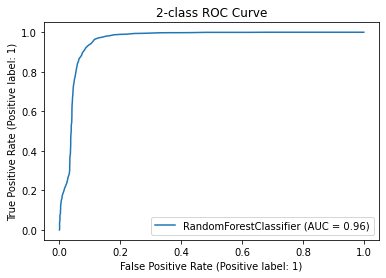

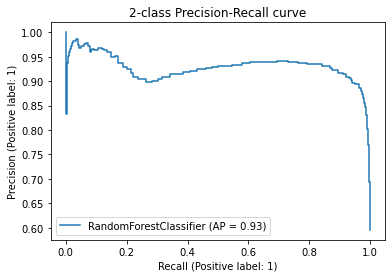

In [23]:

create_roc_curve(RFclassifier, y_test,y_pred)
create_precision_recall_curve(RFclassifier, y_test, X_test,y_pred )

/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


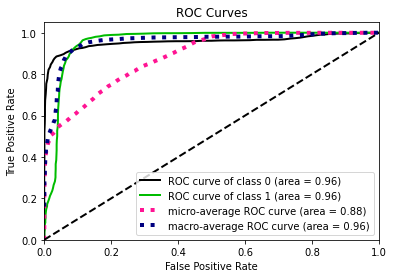

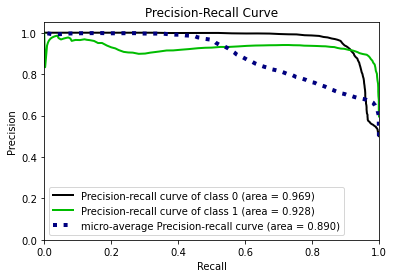

In [31]:
skplt.metrics.plot_roc(y_test, y_prob)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()

In [4]:
with open("/mnt/vdb/thesis/best_RF.model", 'rb') as file:
    RFclassifier = pickle.load(file)
# summarize model.
RFclassifier

RandomForestClassifier(random_state=42)

	Brier: 0.138
	Precision: 0.934
	Recall: 0.579
	F1: 0.715



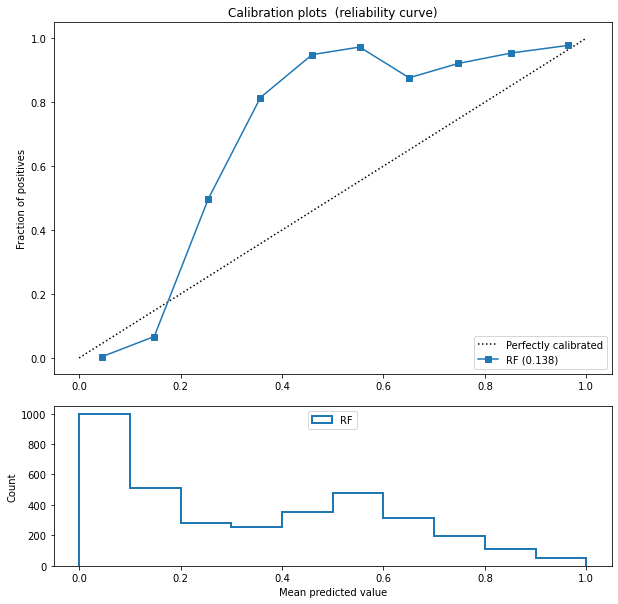

In [8]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
name = "RF"

fig = plt.figure( figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

y_pred = RFclassifier.predict(X_test)
if hasattr(RFclassifier, "predict_proba"):
    prob_pos = RFclassifier.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = RFclassifier.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

clf_score = brier_score_loss(y_test, prob_pos)

print("\tBrier: %1.3f" % (clf_score)) # Brier score, reported in the legend (the smaller the better).
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
 
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

In [6]:
with open('/mnt/vdb/thesis/best_RF.model', 'wb') as f:
    pickle.dump(RFclassifier, f)

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


inputs =X_train
targets = y_train
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
_precision = []
_recal = []
_f1 = []
_auc_pr = []
_roc_pr = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index  in kfold.split(inputs, targets):
    
    X_train= inputs[train_index]
    y_train= targets[train_index]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model =RandomForestClassifier ( random_state=42)
    model.fit(X_train,y_train)
    # Generate generalization metrics

    # predict probabilities for test set
    y_predict = model.predict(X_test)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_predict, y_test)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_predict,y_test)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_predict,y_test )
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 =  f1_score(y_predict,y_test)
    print('F1 score: %f' % f1)
    
    acc_per_fold.append(accuracy * 100)
    _precision.append(precision * 100)  
    _recal.append(recall * 100)  
    _f1.append(f1 * 100)  
 
    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Pecision: {np.mean(_precision)} (+- {np.std(_precision)})')
print(f'> Recall: {np.mean(_recal)} (+- {np.std(_recal)})')
print(f'> F1: {np.mean(_f1)} (+- {np.std(_f1)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Accuracy: 0.755343
Precision: 0.557368
Recall: 0.922719
F1 score: 0.694951
------------------------------------------------------------------------
Training for fold 2 ...
Accuracy: 0.743251
Precision: 0.538245
Recall: 0.912297
F1 score: 0.677043
------------------------------------------------------------------------
Training for fold 3 ...
Accuracy: 0.750281
Precision: 0.549494
Recall: 0.918233
F1 score: 0.687544
------------------------------------------------------------------------
Training for fold 4 ...
Accuracy: 0.743813
Precision: 0.538245
Recall: 0.914040
F1 score: 0.677522
------------------------------------------------------------------------
Training for fold 5 ...
Accuracy: 0.746063
Precision: 0.541620
Recall: 0.916270
F1 score: 0.680806
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 74.77502812148482 (+- 0.4

/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


inputs =X_train
targets = y_train
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
_precision = []
_recal = []
_f1 = []
_auc_pr = []
_roc_pr = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index  in kfold.split(inputs, targets):
    
    X_train= inputs[train_index]
    y_train= targets[train_index]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model =RandomForestClassifier ( random_state=42)
    model.fit(X_train,y_train)
    # Generate generalization metrics

    # predict probabilities for test set
    y_predict = model.predict(X_test)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_predict, y_test)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = (precision_score(y_predict,y_test, pos_label= 1)+precision_score(y_predict,y_test , pos_label= 0))*0.5
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = (recall_score(y_predict,y_test, pos_label= 1)+recall_score(y_predict,y_test , pos_label= 0))*0.5
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 =  (f1_score(y_predict,y_test, pos_label= 1)+f1_score(y_predict,y_test , pos_label= 0))*0.5
    print('F1 score: %f' % f1)
    
    acc_per_fold.append(accuracy * 100)
    _precision.append(precision * 100)  
    _recal.append(recall * 100)  
    _f1.append(f1 * 100)  
 
    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Pecision: {np.mean(_precision)} (+- {np.std(_precision)})')
print(f'> Recall: {np.mean(_recal)} (+- {np.std(_recal)})')
print(f'> F1: {np.mean(_f1)} (+- {np.std(_f1)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Accuracy: 0.756749
Precision: 0.756749
Recall: 0.805295
F1 score: 0.746679
------------------------------------------------------------------------
Training for fold 2 ...
Accuracy: 0.755906
Precision: 0.755906
Recall: 0.807109
F1 score: 0.745289
------------------------------------------------------------------------
Training for fold 3 ...
Accuracy: 0.761530
Precision: 0.761530
Recall: 0.808218
F1 score: 0.752144
------------------------------------------------------------------------
Training for fold 4 ...
Accuracy: 0.753656
Precision: 0.753656
Recall: 0.801777
F1 score: 0.743427
------------------------------------------------------------------------
Training for fold 5 ...
Accuracy: 0.760405
Precision: 0.760405
Recall: 0.804714
F1 score: 0.751366
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 75.76490438695163 (+- 0.2

/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### PSSM -SET9

In [3]:
with open( "/mnt/vdb/thesis/trainingset2/set9/pssm/AMP/AMP.pssm.plk", 'rb') as file:
    AMPs_df = pickle.load(file)
AMPs_df["class"] = 0
with open( "/mnt/vdb/thesis/trainingset2/set9/pssm/nonAMP/nonAMP.pssm.plk", 'rb') as file:
    nonAMPs_df = pickle.load(file)   
nonAMPs_df["class"] = 1

AMPNonAMP_df = pd.concat([AMPs_df, nonAMPs_df], ignore_index=True)

#AMPs_df = AMPs_df[AMPs_df["length"] <= 300 ]
with open( "../datasets/thesis/trainingset2/benchmark_set/AMPnonAMP.pssm.pkl", 'rb') as file:
    benchmark_AMPs_df = pickle.load(file)
    
X_train = np.array(AMPNonAMP_df['reps'].to_list())
y_train = np.array(AMPNonAMP_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())

In [ ]:
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

In [51]:
RFclassifier = RandomForestClassifier ( random_state=42)
clf_isotonic = CalibratedClassifierCV(RFclassifier, method='isotonic')
clf_isotonic.fit(X_train, y_train)
#predictions_isotonic = clf_isotonic.predict_proba(X_test)
#RFclassifier.fit(X_train, y_train)
y_pred = clf_isotonic.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1778
           1       0.86      0.78      0.82      1778

    accuracy                           0.82      3556
   macro avg       0.83      0.82      0.82      3556
weighted avg       0.83      0.82      0.82      3556



	Brier: 0.119
	Precision: 0.857
	Recall: 0.779
	F1: 0.816



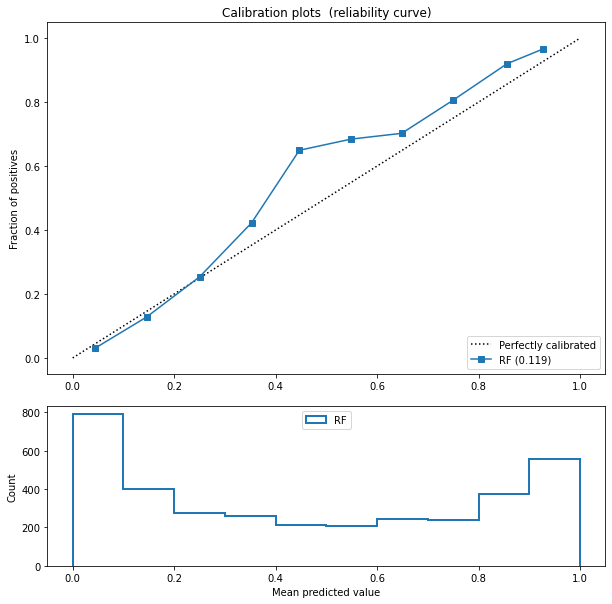

In [52]:
fig = plt.figure( figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

if hasattr(clf_isotonic, "predict_proba"):
    prob_pos = clf_isotonic.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = clf_isotonic.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

clf_score = brier_score_loss(y_test, prob_pos)

print("\tBrier: %1.3f" % (clf_score)) # Brier score, reported in the legend (the smaller the better).
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
 
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

In [55]:
AMPNonAMP_df

,ID,Sequence,reps,length,class
0,cluster25713,SDVARRFMRRQSRVIKGLV,"[0.544095668702679, 0.47370848260698156, 0.473...",19,0
1,cluster25714,RDVCRNFMRRYQSRVIQGLV,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",20,0
2,cluster25715,RDVSRRFMRRGRDVSRRFMRR,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",21,0
3,cluster25716,RDVSRRFMRRRDVSRRFMRR,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",20,0
4,cluster25717,RECRIGNGQCKNQCHENEIRIAYCIRPGTHCCLQ,"[0.5249058410464313, 0.4926475888339939, 0.492...",34,0
...,...,...,...,...,...
70770,UniRef50_A0A6V7M472,MLNYLTVNAYRTLEQCKPKI,"[0.5422738369387539, 0.4875026035157896, 0.487...",20,1
70771,UniRef50_A0A6V7JUV0,AIRATNLHHSTVILALVKKS,"[0.6244547736766732, 0.46257015465625045, 0.46...",20,1
70772,UniRef50_A0A6V7HXG9,CSSISVTVFTAGPKNRRLLD,"[0.5422738369387539, 0.4875026035157896, 0.487...",20,1
70773,UniRef50_A0A6V7JD98,IQRSSINSNGSSETDGVQVF,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",20,1


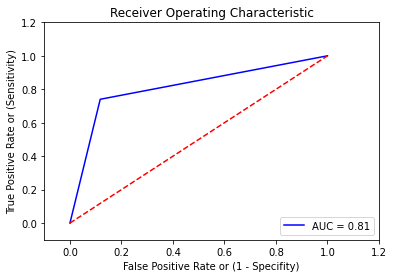

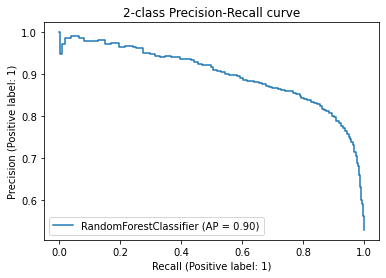

In [15]:
create_roc_curve(y_test,y_pred,1)
create_precision_recall_curve(RFclassifier, y_test, X_test,y_pred )

/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


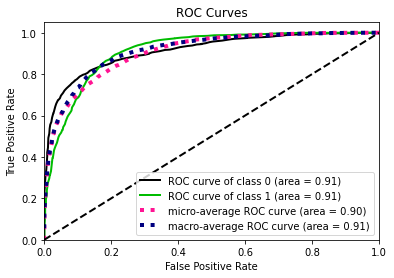

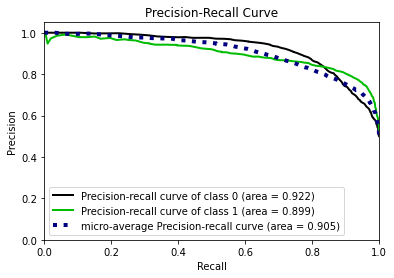

In [36]:
y_prob =  RFclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()

In [16]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    RFclassifier, X_train, y_train, scoring=scoring, cv=kfold, return_train_score=True)
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))

Accuracy TEST: 0.88 (+/- 0.00) Accuracy TRAIN: 1.00 (+/- 0.00)
F1 TEST: 0.88 (+/- 0.00) F1 TRAIN : 1.00 (+/- 0.00) 
AUROC TEST: 0.94 (+/- 0.00) AUROC TRAIN : 1.00 (+/- 0.00)
recall TEST: 0.89 (+/- 0.01) recall TRAIN: 1.00 (+/- 0.00)
Precision TEST: 0.87 (+/- 0.01) Precision TRAIN: 1.00 (+/- 0.00)


In [17]:
with open('/mnt/vdb/thesis/best_RF.pssm.model', 'wb') as f:
    pickle.dump(RFclassifier, f)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


inputs =X_train
targets = y_train
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
_precision = []
_recal = []
_f1 = []
_auc_pr = []
_roc_pr = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index  in kfold.split(inputs, targets):
    
    X_train= inputs[train_index]
    y_train= targets[train_index]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model =RandomForestClassifier ( random_state=42)
    model.fit(X_train,y_train)
    # Generate generalization metrics

    # predict probabilities for test set
    y_predict = model.predict(X_test)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_predict, y_test)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = (precision_score(y_predict,y_test, pos_label= 1)+precision_score(y_predict,y_test , pos_label= 0))*0.5
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = (recall_score(y_predict,y_test, pos_label= 1)+recall_score(y_predict,y_test , pos_label= 0))*0.5
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 =  (f1_score(y_predict,y_test, pos_label= 1)+f1_score(y_predict,y_test , pos_label= 0))*0.5
    print('F1 score: %f' % f1)
    
    acc_per_fold.append(accuracy * 100)
    _precision.append(precision * 100)  
    _recal.append(recall * 100)  
    _f1.append(f1 * 100)  
 
    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Pecision: {np.mean(_precision)} (+- {np.std(_precision)})')
print(f'> Recall: {np.mean(_recal)} (+- {np.std(_recal)})')
print(f'> F1: {np.mean(_f1)} (+- {np.std(_f1)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

# SET 10

In [4]:
    
X_train = np.array(AMPNonAMP_df['reps'].to_list())
y_train = np.array(AMPNonAMP_df['class'].to_list())
X_test = np.array(benchmark_AMPs_df["reps"].to_list())
y_test = np.array( benchmark_AMPs_df["class"].to_list())

In [5]:
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      1778
           1       0.83      0.67      0.74      1778

    accuracy                           0.77      3556
   macro avg       0.78      0.77      0.77      3556
weighted avg       0.78      0.77      0.77      3556



In [5]:
## - C-0.4
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78      1778
           1       0.81      0.70      0.75      1778

    accuracy                           0.77      3556
   macro avg       0.77      0.77      0.77      3556
weighted avg       0.77      0.77      0.77      3556



/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


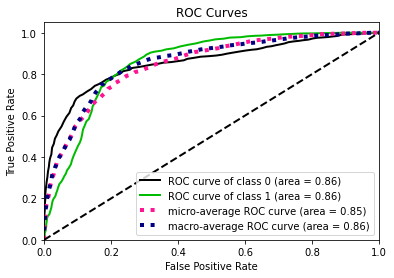

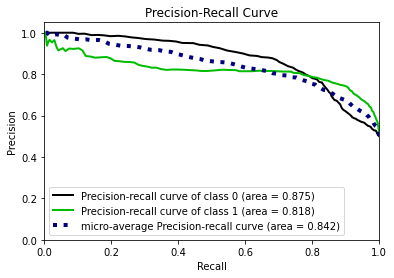

In [6]:
y_prob =  RFclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()

In [7]:
with open('/mnt/vdb/thesis/best_RF.set_10.model', 'wb') as f:
    pickle.dump(RFclassifier, f)

In [5]:
## - C-0.5
RFclassifier = RandomForestClassifier ( random_state=42)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1778
           1       0.83      0.68      0.74      1778

    accuracy                           0.77      3556
   macro avg       0.78      0.77      0.77      3556
weighted avg       0.78      0.77      0.77      3556

